In [17]:
#Imports
from zmqRemoteApi import RemoteAPIClient
import time
import numpy
from matplotlib import pyplot as plt

from scipy import stats

In [8]:
client = RemoteAPIClient()
sim = client.getObject('sim')
client.setStepping(True)
human = sim.getObject('./mannequin')
robot = sim.getObject('./UR10')
humanRightHand = sim.getObject('./mannequin/Group[2]')
robotTip = sim.getObject('./UR10/manipulationSphereBase/manipulationSphere')



Creating the random parameters

For the random parameters a gaussian distribution is used

In [47]:
def create_param(a,b):
    out = 0
    out = numpy.random.normal(a,b)
    if out < 0:
        out = 0
    
    return out

In [68]:
def send_signals():
    params = [create_param(4,4), create_param(1,0.25), create_param(0.04, 0.02), create_param(0.2, 0.1)]
    sim.setFloatSignal("humanWait", params[0]) # Humans are messy and lazy
    sim.setFloatSignal("robotWait", params[1]) # Robot usually waits for 1 second with little deviation
    sim.setFloatSignal("humanSpeed", params[2])
    sim.setFloatSignal("robotSpeed", params[3])

In [64]:
#log timestamps and distance for a simulation
def simulate():
    #send new parameters
    send_signals()

    sim.boolparam_display_enabled = False
    sim.intparam_speedmodifier = 100
    
    min = 100000000

    sim.startSimulation()

    startRobotPos = sim.getObjectPosition(robot,sim.handle_world)

    while (t := sim.getSimulationTime()) < 5:
        s = f'Simulation time: {t:.2f} [s]'
        pos1 = sim.getObjectPosition(robotTip,sim.handle_world)
        pos2 = sim.getObjectPosition(humanRightHand,sim.handle_world)
        dist = numpy.linalg.norm(numpy.subtract(pos1,pos2))
        if(dist<min):
            min = dist
        client.step()
    sim.stopSimulation()
    return min

In [69]:
def mc_sim(passes):
    minimums = []
    for i in range(0,passes):
        print(i)
        results = simulate()
        minimums.append(results)
        time.sleep(0.2)
    return minimums

[9.899730896907847, 0.9248866823887378, 0.04681341338045886, 0.314201552783032]


Text(0.5, 1.0, 'Line')

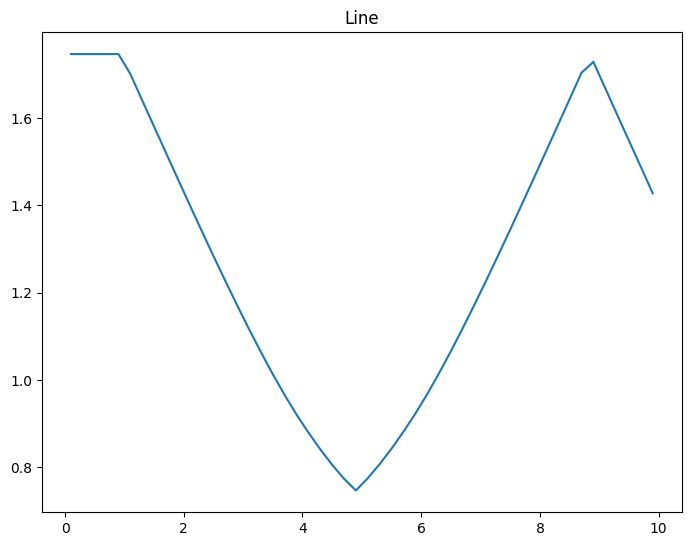

In [59]:
#Run a simple simulation and plot the distance
pass
results = simulate()
fig = plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.plot(results[1], results[0])
ax.set_title("Line")

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


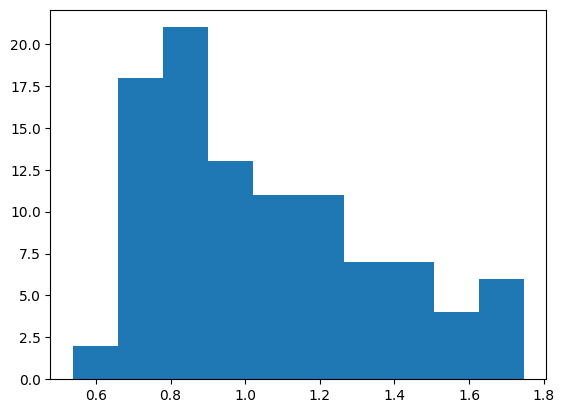

In [71]:
mins = mc_sim(100)
hist = plt.hist(mins)